In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


In [21]:
# Define constants
# knn with merged data 
IMG_SIZE = 64
TRAIN_DATA_PATH = 'data/Train_Alphabet' 
TEST_DATA_PATH = 'data/Test_Alphabet'  
CLASS_NAMES = list(map(chr, range(65, 91)))  # A-Z letters


In [6]:
def load_data(data_path):
    images = []
    labels = []
    for class_name in CLASS_NAMES:
        class_folder = os.path.join(data_path, class_name)
        print(class_folder)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img = img_to_array(img)
            img = preprocess_input(img)  # Preprocessing required for VGG16
            images.append(img)
            labels.append(class_name)
    return np.array(images), np.array(labels)

In [22]:
# Load the dataset X_train, X_test, y_train, y_test
X, y = load_data(TRAIN_DATA_PATH)
X_test, y_test = load_data(TEST_DATA_PATH)

data/Train_Alphabet/A
data/Train_Alphabet/B
data/Train_Alphabet/C
data/Train_Alphabet/D
data/Train_Alphabet/E
data/Train_Alphabet/F
data/Train_Alphabet/G
data/Train_Alphabet/H
data/Train_Alphabet/I
data/Train_Alphabet/J
data/Train_Alphabet/K
data/Train_Alphabet/L
data/Train_Alphabet/M
data/Train_Alphabet/N
data/Train_Alphabet/O
data/Train_Alphabet/P
data/Train_Alphabet/Q
data/Train_Alphabet/R
data/Train_Alphabet/S
data/Train_Alphabet/T
data/Train_Alphabet/U
data/Train_Alphabet/V
data/Train_Alphabet/W
data/Train_Alphabet/X
data/Train_Alphabet/Y
data/Train_Alphabet/Z
data/Test_Alphabet/A
data/Test_Alphabet/B
data/Test_Alphabet/C
data/Test_Alphabet/D
data/Test_Alphabet/E
data/Test_Alphabet/F
data/Test_Alphabet/G
data/Test_Alphabet/H
data/Test_Alphabet/I
data/Test_Alphabet/J
data/Test_Alphabet/K
data/Test_Alphabet/L
data/Test_Alphabet/M
data/Test_Alphabet/N
data/Test_Alphabet/O
data/Test_Alphabet/P
data/Test_Alphabet/Q
data/Test_Alphabet/R
data/Test_Alphabet/S
data/Test_Alphabet/T
data/Tes

In [23]:
X_train = X
y_train = y

In [8]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Reshape for KNN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [25]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [28]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.23923076923076922
              precision    recall  f1-score   support

           A       0.21      0.27      0.24       100
           B       0.21      0.23      0.22       100
           C       0.47      0.36      0.41       100
           D       0.42      0.27      0.33       100
           E       0.10      0.16      0.13       100
           F       0.22      0.21      0.21       100
           G       0.42      0.25      0.31       100
           H       0.45      0.40      0.42       100
           I       0.40      0.38      0.39       100
           J       0.27      0.23      0.25       100
           K       0.21      0.30      0.25       100
           L       0.27      0.30      0.28       100
           M       0.13      0.18      0.15       100
           N       0.14      0.18      0.16       100
           O       0.27      0.26      0.27       100
           P       0.27      0.27      0.27       100
           Q       0.23      0.15      0.18       1

In [29]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])


[[27  1  1  0  4  5  0  0  1  4  3  0  8 10  2  1  1  2  0  5  6  4  1  4
   9  1]
 [ 4 23  1  1  9  3  3  0  1  3  3  1  6  4  3  3  2  2  5  1  2 10  5  3
   0  2]
 [ 2  2 36  2  3  0  1  6  2  2  4  3  2  3  3  1  2  3  5  3  2  4  3  4
   0  2]
 [ 3  4  1 27  5  2  3  4  6  2  4  2  2  4  2  2  2  3  1  1  5  3  1  3
   4  4]
 [ 2  9  1  2 16  5  1  0  2  2  7  2 10  6  1  2  1  3  4  1  6  8  0  6
   3  0]
 [ 4  1  0  4  7 21  0  1  1  6  7  2  8  7  3  4  1  3  1  0  3  2  4  2
   5  3]
 [ 5  4  4  1  5  3 25  4  2  3  6  7  3  2  2  3  3  1  3  3  3  1  3  0
   1  3]
 [ 2  3  4  1  2  3  4 40  2  2  3  4  4  0  1  1  3  0  6  5  3  0  2  2
   2  1]
 [ 2  5  1  2  9  1  1  0 38  2  5  2  3  2  8  2  1  2  3  0  1  2  2  4
   0  2]
 [ 8  6  1  5  6  3  4  0  1 23  2  8  6  3  0  4  1  1  2  3  4  2  2  1
   3  1]
 [ 7  7  4  1  4  5  2  1  3  0 30  1  4  4  0  0  2  4  1  1  4  6  1  1
   4  3]
 [ 3  3  1  2  1  1  2  2  2  5  5 30  1  6  0  8  2  2  1  2  2  4  2  5
   6  2]
 [ 9

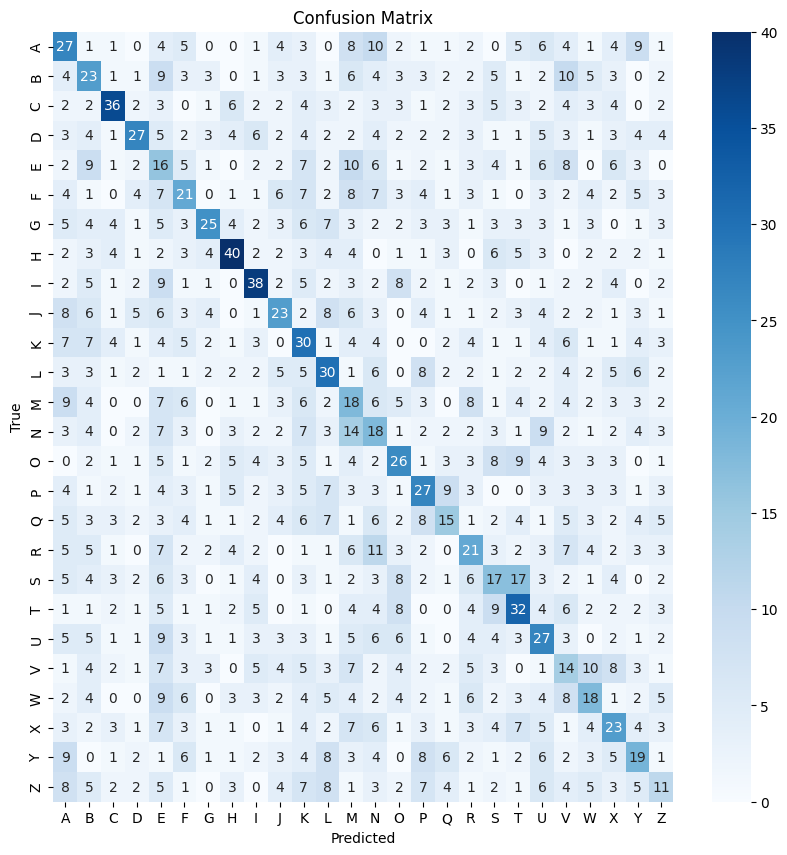

In [30]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.23923076923076922
Precision score :  0.2529010884780848
Recall score :  0.23923076923076922
F1 score :  0.24249629871627182


In [32]:
# ... your previous code

from tabulate import tabulate

# Define the path of the test data
TEST_DATA_PATH = 'data/asl_alphabet_test/asl_alphabet_test'
PERSONAL_TEST_DATA_PATH = 'OurAlphabet'

def predict_image(image_path, model, img_size=IMG_SIZE):
    img = load_img(image_path, target_size=(img_size, img_size))
    img = img_to_array(img)
    img = preprocess_input(img)  # Preprocessing required for VGG16
    img = img.reshape(1, -1)  # Reshape for KNN
    prediction = model.predict(img)
    return prediction[0]

# Create two DataFrames to store the results
test_results = pd.DataFrame(columns=['Image', 'True Label', 'Predicted Label'])
personal_results = pd.DataFrame(columns=['Image', 'True Label', 'Predicted Label'])

# Test with the provided test data
for class_name in CLASS_NAMES:
    img_name = f'{class_name}_test.jpg'
    img_path = os.path.join(TEST_DATA_PATH, img_name)
    predicted_label = predict_image(img_path, knn)
    test_results = pd.concat([test_results, pd.DataFrame({
        'Image': [img_name], 
        'True Label': [class_name], 
        'Predicted Label': [predicted_label]
    })])

# Drop 'Image' column and display the table
test_results = test_results.drop(columns=['Image'])
print("\nResults for provided test data:")
print(tabulate(test_results, headers='keys', tablefmt='pretty', showindex=False))

# Test with your personal hand images
for class_name in sorted(os.listdir(PERSONAL_TEST_DATA_PATH)):
    img_name = f'{class_name}'
    img_path = os.path.join(PERSONAL_TEST_DATA_PATH, img_name)
    predicted_label = predict_image(img_path, knn)
    personal_results = pd.concat([personal_results, pd.DataFrame({
        'Image': [img_name], 
        'True Label': [class_name], 
        'Predicted Label': [predicted_label]
    })])

# Drop 'Image' column and display the table
personal_results = personal_results.drop(columns=['Image'])
print("\nResults for personal hand images:")
print(tabulate(personal_results, headers='keys', tablefmt='pretty', showindex=False))


Results for provided test data:
+------------+-----------------+
| True Label | Predicted Label |
+------------+-----------------+
|     A      |        N        |
|     B      |        C        |
|     C      |        G        |
|     D      |        B        |
|     E      |        E        |
|     F      |        B        |
|     G      |        H        |
|     H      |        F        |
|     I      |        U        |
|     J      |        V        |
|     K      |        V        |
|     L      |        D        |
|     M      |        I        |
|     N      |        N        |
|     O      |        Y        |
|     P      |        K        |
|     Q      |        L        |
|     R      |        U        |
|     S      |        U        |
|     T      |        N        |
|     U      |        D        |
|     V      |        Y        |
|     W      |        I        |
|     X      |        D        |
|     Y      |        Y        |
|     Z      |        U        |
+---------

# 10 neighbors

In [33]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [34]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [36]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.23346153846153847
              precision    recall  f1-score   support

           A       0.15      0.39      0.22       100
           B       0.18      0.31      0.22       100
           C       0.49      0.41      0.45       100
           D       0.37      0.28      0.32       100
           E       0.11      0.22      0.15       100
           F       0.20      0.23      0.21       100
           G       0.39      0.25      0.30       100
           H       0.42      0.44      0.43       100
           I       0.36      0.45      0.40       100
           J       0.23      0.25      0.24       100
           K       0.13      0.21      0.16       100
           L       0.28      0.24      0.26       100
           M       0.11      0.15      0.12       100
           N       0.15      0.16      0.16       100
           O       0.34      0.30      0.32       100
           P       0.34      0.25      0.29       100
           Q       0.19      0.13      0.16       1

In [37]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[39  3  1  1  5  2  1  0  4  1  3  3  8  5  3  1  1  0  3  0  5  5  1  1
   4  0]
 [11 31  2  2  8  1  2  0  2  5  9  0  3  7  2  1  0  3  2  0  3  3  1  1
   1  0]
 [ 5  3 41  1  1  2  3  4  8  0  5  3  2  1  0  1  4  1  2  3  1  0  4  2
   1  2]
 [19  7  2 28  3  1  4  1  2  6  2  2  2  2  1  3  5  1  0  1  2  1  0  0
   4  1]
 [ 9 12  0  2 22  2  1  1  4  3  5  1 10  5  1  2  0  2  3  0  1  7  3  1
   2  1]
 [ 9  9  1  1  6 23  1  1  2  8  5  3  8  3  1  4  0  4  1  0  2  1  4  1
   0  2]
 [10  5  4  0  8  6 25  6  2  3  1  2  4  7  0  2  5  2  1  1  1  0  0  1
   2  2]
 [ 5  4  2  6  3  3  2 44  5  2  3  2  2  0  4  0  1  1  3  3  1  1  1  1
   1  0]
 [ 9  6  1  2  7  3  1  0 45  0  4  1  4  1  5  2  0  1  1  3  2  0  0  2
   0  0]
 [ 7  1  2  1  3  9  4  3  2 25  7  7  6  3  2  2  1  2  0  3  1  5  4  0
   0  0]
 [ 8  3  2  2  7  5  2  6  2  3 21  3  8  3  5  0  4  5  0  0  2  4  1  2
   2  0]
 [ 7  5  1  5  4  7  1  3  1  9  8 24  1  6  1  1  2  3  3  0  0  1  1  2
   3  1]
 [ 9

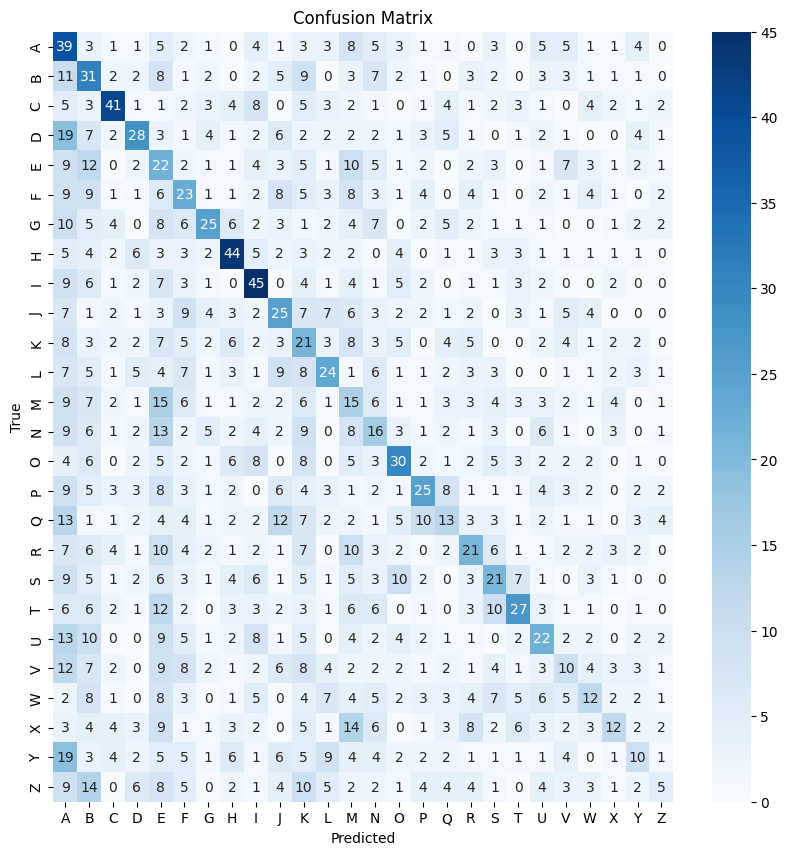

In [38]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.23346153846153847
Precision score :  0.253554857355286
Recall score :  0.23346153846153847
F1 score :  0.23335286226645152


# 5 neighbors

In [40]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [43]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.22423076923076923
              precision    recall  f1-score   support

           A       0.13      0.45      0.20       100
           B       0.14      0.37      0.20       100
           C       0.27      0.39      0.32       100
           D       0.25      0.30      0.27       100
           E       0.08      0.22      0.12       100
           F       0.16      0.23      0.19       100
           G       0.31      0.23      0.26       100
           H       0.36      0.37      0.36       100
           I       0.38      0.43      0.41       100
           J       0.28      0.24      0.26       100
           K       0.19      0.21      0.20       100
           L       0.25      0.18      0.21       100
           M       0.15      0.15      0.15       100
           N       0.20      0.17      0.18       100
           O       0.47      0.26      0.34       100
           P       0.40      0.21      0.28       100
           Q       0.35      0.14      0.20       1

In [44]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[45  3  3  1  7  2  4  1  1  2  1  2  8  6  1  0  1  0  3  0  3  3  1  1
   0  1]
 [ 6 37  2  2 10  4  1  0  1  4  7  1  3  6  2  0  0  0  3  0  4  4  2  0
   0  1]
 [ 7  8 39  3  4  4  4  3  7  1  2  0  0  1  0  0  3  2  1  3  1  0  3  2
   0  2]
 [18 11  5 30  4  2  1  2  3  1  3  1  3  4  1  0  1  1  0  1  1  1  1  3
   2  0]
 [16 17  5  4 22  3  2  0  2  2  1  2  5  5  0  2  0  1  3  0  0  4  0  3
   1  0]
 [12 14  4  5 11 23  0  1  1  3  5  3  6  2  2  2  0  1  0  0  1  0  3  0
   0  1]
 [12  8  8  3 13  7 23  2  0  1  2  3  2  2  1  1  4  0  0  1  2  0  1  4
   0  0]
 [ 7 10  7  4  9  5  4 37  3  0  1  1  1  0  0  0  1  1  1  2  2  0  2  0
   1  1]
 [ 6  7  4  2 14  2  1  2 43  0  4  2  1  1  4  0  0  2  2  1  2  0  0  0
   0  0]
 [15  7  2  6  8  5  5  2  0 24  4  2  0  3  0  4  1  1  0  0  1  3  1  1
   5  0]
 [13 13  2  3 12  6  3  3  2  1 21  1  4  3  2  0  1  2  0  0  2  2  1  1
   2  0]
 [12  8  4  4  4  6  3  4  1  8  3 18  1  4  0  3  4  1  1  1  0  4  2  1
   1  2]
 [12

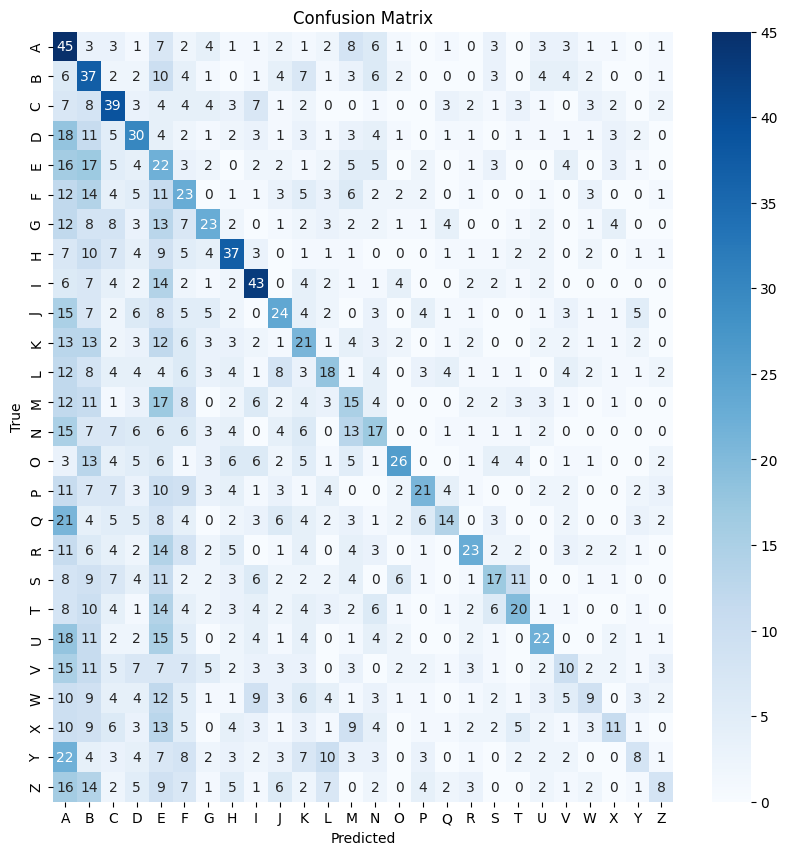

In [45]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.22423076923076923
Precision score :  0.27182510130556986
Recall score :  0.22423076923076923
F1 score :  0.22530621138182227


# 2 neighbors

In [47]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

In [48]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [50]:
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print empirical error
empirical_error = 1 - accuracy_score(y_test, y_pred)
print(f'Empirical error: {empirical_error}')

Accuracy: 0.2073076923076923
              precision    recall  f1-score   support

           A       0.16      0.37      0.23       100
           B       0.16      0.32      0.22       100
           C       0.36      0.41      0.38       100
           D       0.29      0.31      0.30       100
           E       0.10      0.23      0.14       100
           F       0.18      0.29      0.23       100
           G       0.27      0.24      0.26       100
           H       0.36      0.35      0.35       100
           I       0.29      0.38      0.33       100
           J       0.23      0.26      0.25       100
           K       0.14      0.23      0.18       100
           L       0.24      0.29      0.26       100
           M       0.10      0.14      0.12       100
           N       0.12      0.14      0.13       100
           O       0.28      0.29      0.28       100
           P       0.26      0.24      0.25       100
           Q       0.22      0.10      0.14       10

In [51]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=CLASS_NAMES)
print(conf_mat)

# Create a DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=[i for i in CLASS_NAMES], columns=[i for i in CLASS_NAMES])

[[37  4  1  2  6  6  1  0  3  3  2  1 12  6  1  3  1  2  0  3  1  2  2  1
   0  0]
 [ 4 32  4  1 12  5  4  0  2  4  6  1  4  3  4  3  0  2  4  1  1  2  1  0
   0  0]
 [ 6  3 41  5  3  0  3  6  5  3  5  1  1  2  2  0  3  1  4  3  1  0  1  1
   0  0]
 [10 10  2 31  8  3  3  3  7  1  5  1  2  5  2  1  1  0  1  0  0  2  0  1
   1  0]
 [ 5 16  3  6 23  3  2  0  3  5  6  3  8  2  1  1  1  3  2  1  3  3  0  0
   0  0]
 [ 6  4  3  5  9 29  0  0  2  7  7  5  6  5  3  2  0  2  1  0  2  1  1  0
   0  0]
 [11  6  5  5  7 10 24  4  1  3  4  6  2  1  1  3  2  2  1  0  1  0  1  0
   0  0]
 [ 3  6  5  3  9  4 10 35  5  6  2  1  2  0  3  2  1  1  0  1  1  0  0  0
   0  0]
 [ 4  9  4  3  9  2  1  1 38  0  3  3  4  2  5  3  1  1  2  1  1  2  0  0
   1  0]
 [12  6  2  6  7  4  6  0  1 26  4  7  3  1  2  3  0  1  2  1  2  3  1  0
   0  0]
 [ 9 12  6  2  9  4  2  5  4  2 23  3  5  5  2  1  1  0  2  1  1  0  0  1
   0  0]
 [ 6  4  4  3  3  5  2  3  3  7  5 29  6  3  1  4  0  2  2  1  1  2  1  2
   1  0]
 [12

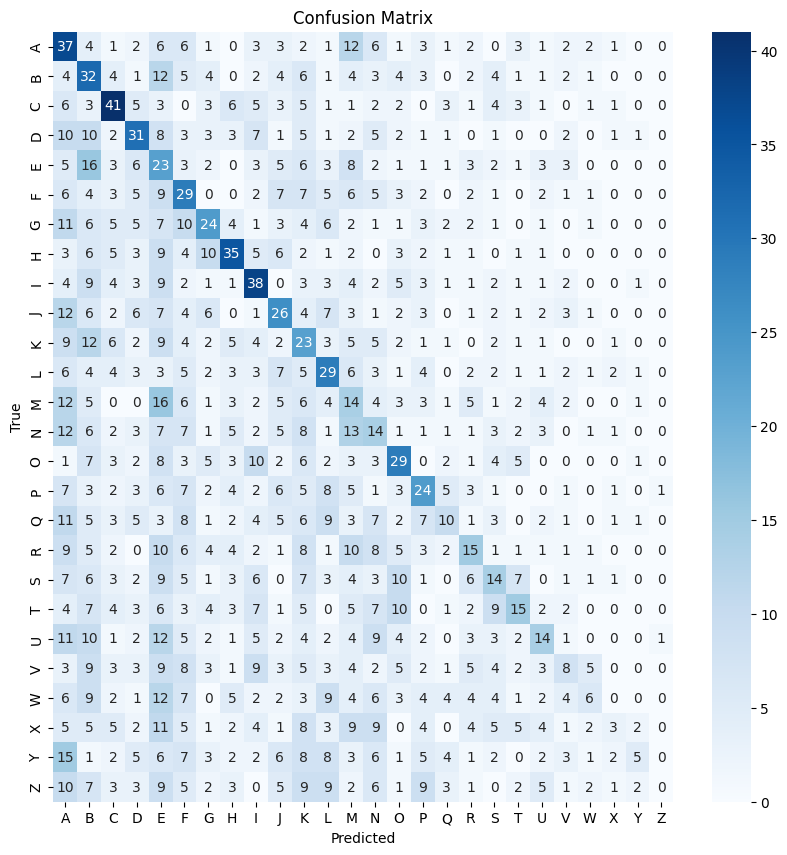

In [52]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ',recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.2073076923076923
Precision score :  0.21610898447240726
Recall score :  0.2073076923076923
F1 score :  0.19546676576619565
